# Part 7 - Combining input data
- toc: True
- badges: true
- comments: true
- categories: [jupyter]

In this notebook I will describe my code to download data from Google trends as well as code to pull keyword suggestions" based on some *seed keywords.

I start in the usual way I do with all my notebooks with

imports
print version for Python and non standar modules
This boilerplate code is evolving and hopefully getting better

In [1]:
import os
import sys
import inspect
import datetime
import pandas as pd
import numpy as np
from plotnine import ggplot
import matplotlib.pyplot as plt

In [2]:
data_dir = "./data"
fnames = os.listdir(data_dir)
dfs = {}
for fname in fnames:
    fpath = os.path.join(data_dir, fname)
    head, tail = os.path.split(fpath)
    fbase,ext = os.path.splitext(tail)
    if os.path.isfile(fpath) and ext == ".csv":
        df = pd.read_csv(fpath)
        print("{0}  shape:{1}".format(fbase,df.shape))
        dfs[fbase] = df

fred  shape:(3604, 7)
google_keywords  shape:(24, 6)
tidy_fred  shape:(868, 17)
umich_exp  shape:(153, 5)
us_pau_claims  shape:(33, 4)


In [20]:
fred_claims = dfs["tidy_fred"][["date", "ICSA", "CCSA"]]
fred_claims["date"] = pd.to_datetime(fred_claims["date"])
pau_claims = dfs['us_pau_claims']
pau_claims["date"] = pd.to_datetime(pau_claims["date"])

print("Fred\n{0}\n".format(fred_claims.tail(2)))
print("pau\n{0}\n".format(pau_claims.tail(2)))

claims_df = fred_claims.merge(pau_claims, how="outer", on="date")
claims_df.set_index(keys="date", inplace=True)
print("claims\n{0}\n".format(claims_df.tail(2)))
#claims_df.index = pd.to_datetime(claims_df.index)
#print(claims_df.tail(2))

Fred
          date      ICSA       CCSA
866 2020-11-14  742000.0  6071000.0
867 2020-11-21  778000.0        NaN

pau
         date    PUA IC     PUA CC    PEUC CC
31 2020-11-07  296374.0  8681647.0  4376847.0
32 2020-11-14  320237.0        NaN        NaN

claims
                ICSA       CCSA    PUA IC  PUA CC  PEUC CC
date                                                      
2020-11-14  742000.0  6071000.0  320237.0     NaN      NaN
2020-11-21  778000.0        NaN       NaN     NaN      NaN



<ipython-input-20-d61b5487242c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
claims_df.sort_index( inplace=True)
print(claims_df.columns)
print(claims_df.tail(10))
ic_df = claims_df[[ "ICSA", 'PUA IC']].dropna(how="all")
ic_df["IC_all"] = ic_df.sum(axis=1, skipna=False)
cc_df = claims_df[[ "CCSA", 'PUA CC', 'PEUC CC']].dropna(how="all")
cc_df["CC_all"] = cc_df.sum(axis=1, skipna=False)
print(cc_df.tail())
print(ic_df.tail())

Index(['ICSA', 'CCSA', 'PUA IC', 'PUA CC', 'PEUC CC'], dtype='object')
                ICSA        CCSA    PUA IC      PUA CC    PEUC CC
date                                                             
2020-09-26  837000.0  10976000.0  450696.0  10686922.0  1989499.0
2020-10-01       NaN         NaN       NaN         NaN        NaN
2020-10-03  840000.0  10018000.0  378964.0  10978217.0  2824685.0
2020-10-10  898000.0   8373000.0  337380.0  10450384.0  3334878.0
2020-10-17  787000.0   7756000.0  345440.0  10622725.0  3711089.0
2020-10-24  751000.0   7285000.0  359044.0   9332610.0  3983613.0
2020-10-31  751000.0   6786000.0  361959.0   9433127.0  4143389.0
2020-11-07  709000.0   6372000.0  296374.0   8681647.0  4376847.0
2020-11-14  742000.0   6071000.0  320237.0         NaN        NaN
2020-11-21  778000.0         NaN       NaN         NaN        NaN
                 CCSA      PUA CC    PEUC CC      CC_all
date                                                    
2020-10-17  7756000.0  

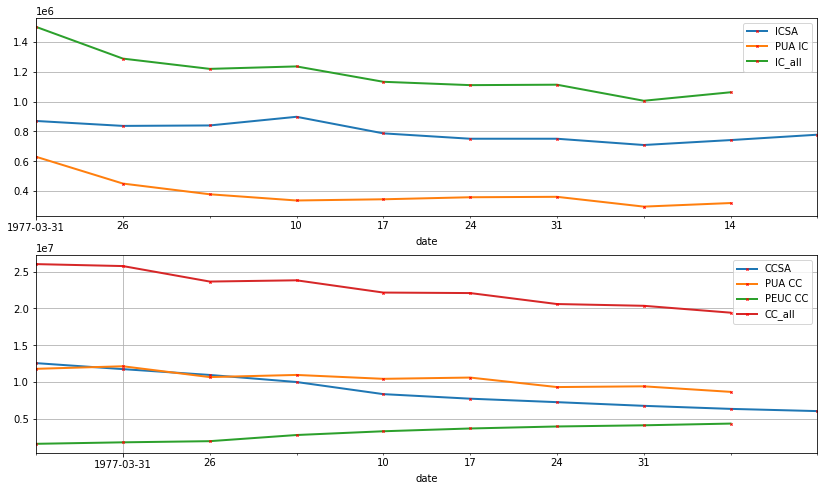

In [33]:
import matplotlib.dates as mdates
figwd = 14
fight= 8
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=[figwd, fight], sharex='row')
ic_df.tail(10).plot(ax=axs[0],  kind='line', linestyle='-', marker='x', lw=2,
               mec='red', mfc='black', ms=2.2, legend=True, label=None, grid=True)
cc_df.tail(10).plot(ax=axs[1],  kind='line', linestyle='-', marker='x', lw=2,
               mec='red', mfc='black', ms=2.2, legend=True, label=None, grid=True)
loc = mdates.DayLocator([0,31])
axs[0].xaxis.set_major_locator(loc)
axs[0].xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
axs[1].xaxis.set_major_locator(loc)
axs[1].xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
plt.show()

In [34]:
if False:
    from plotnine import ggplot, geom_line
    ggplot(data=ic_df) + geom_line()